In [1]:
import requests
import pandas as pd
import numpy as np

from time import time
  
import matplotlib.pyplot as plt
import numpy as np

from pitch import Pitch
from match import Match

%load_ext autoreload
%autoreload 2

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"

In [3]:
match_url = base_url + "matches/{}/{}.json"
event_url = base_url + "events/{}.json"
comp_url = base_url + "competitions.json"
lineup_url = base_url + "lineups/{}.json"

match_id = 8650
#match_id = 7586
comp_id = 43
season_id = 3

In [4]:
bel_bra = requests.get(event_url.format(match_id)).json()
fifawc = requests.get(match_url.format(comp_id,season_id)).json()
lineup = requests.get(lineup_url.format(match_id)).json()


In [5]:
from match import Match
testmatch = Match(bel_bra, fifawc, match_id, lineup)

In [6]:
home_formation = testmatch.events[0]['tactics']['formation']
away_formation = testmatch.events[1]['tactics']['formation']

In [7]:
from pitch import Pitch

In [8]:
up = testmatch.events[0]['tactics']['lineup']
lineup_list = []
for player in up:
    lineup_list.append([player['player']['name'], player['position']['name'],player['jersey_number']])

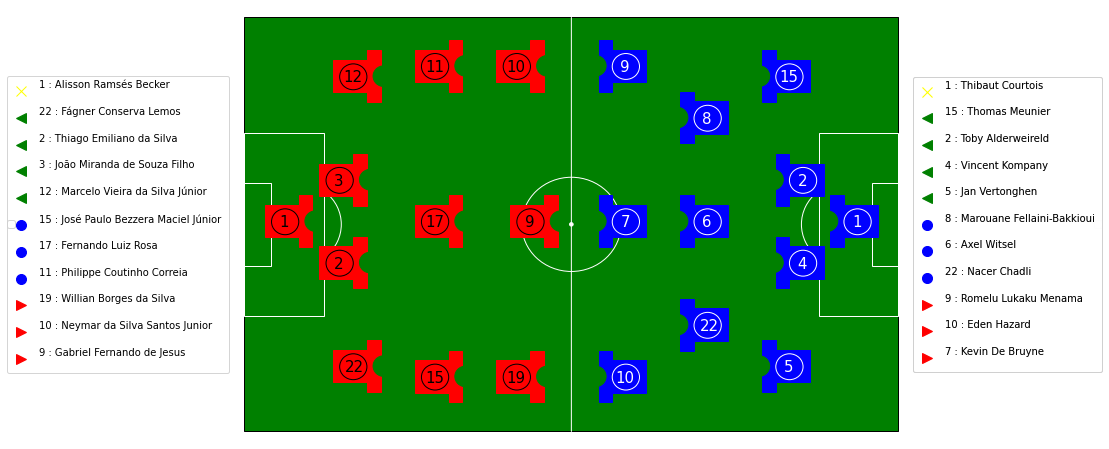

In [9]:
testmatch.Lineups()

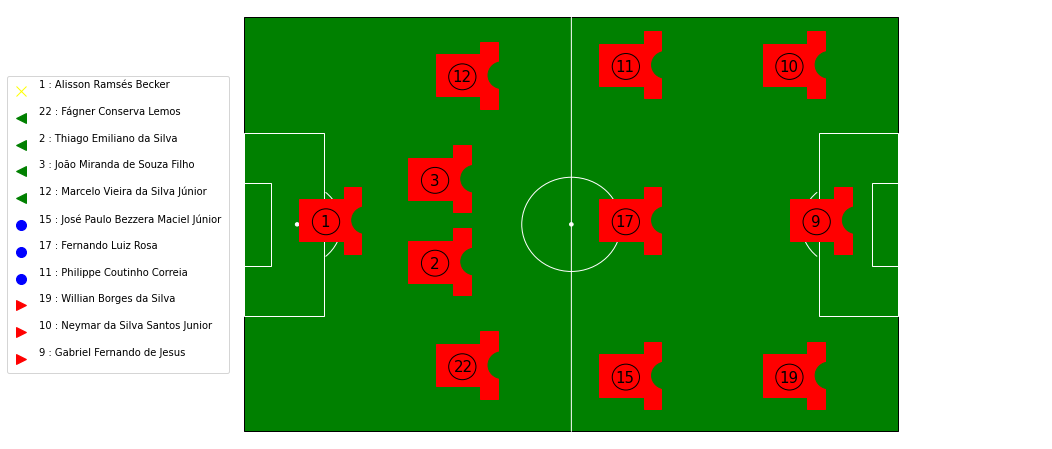

In [10]:
testmatch.Formation(True)

In [15]:
testmatch.events[2]

{'id': '7cb7331e-0584-48c0-ab9b-d0ff329eaaf8',
 'index': 3,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 18, 'name': 'Half Start'},
 'possession': 1,
 'possession_team': {'id': 781, 'name': 'Brazil'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 781, 'name': 'Brazil'},
 'duration': 8.013,
 'related_events': ['63135f69-70fd-4a50-899e-0d7924423531']}

In [21]:
for i in testmatch.competition:
    if i['match_id'] == testmatch.match_id:
        match_in_comp = i

In [35]:
list(match_in_comp.keys())

['match_id',
 'match_date',
 'kick_off',
 'competition',
 'season',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'match_status',
 'last_updated',
 'metadata',
 'match_week',
 'competition_stage']

In [41]:
match_in_comp['home_team']['managers'][0]

{'id': 547,
 'name': 'Adenor Leonardo Bacchi',
 'nickname': 'Tite',
 'dob': '1961-05-25',
 'country': {'id': 31, 'name': 'Brazil'}}

In [45]:
home_manager = match_in_comp['home_team']['managers'][0]['nickname'] if  match_in_comp['home_team']['managers'][0]['nickname'] else  match_in_comp['home_team']['managers'][0]['name']

In [46]:
away_manager = match_in_comp['away_team']['managers'][0]['nickname'] if  match_in_comp['home_team']['managers'][0]['nickname'] else  match_in_comp['home_team']['managers'][0]['name']

In [47]:
print (home_manager, away_manager)

Tite Roberto Martínez
